In [1]:
# import Pytorch
import torch
from torch import nn
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets
from torchvision.transforms import v2


# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.5.1
0.20.1


## 1. getting the Dataset

We will use [FashionMNIST Dataset](https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST)

In [2]:
# Setup training data
train_data = datasets.FashionMNIST(root='data', 
                                   train=True, 
                                   download=True, 
                                   transform=v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)]), 
                                   target_transform=None)

test_data = datasets.FashionMNIST(root='data', 
                                  train=False, 
                                  download=True, 
                                  transform=v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)]), 
                                  target_transform=None)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
image, label = train_data[0]
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [5]:
classes_name = train_data.classes
classes_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
classes_to_idx = train_data.class_to_idx
classes_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

## 1.1 Check Input & Output shape of the data


In [8]:
# Check the shape of the input & output data

print(f"The shape of the first input Image: {image.shape} -> [color_channels, height, width]")
print(f"The label of the first input Image: {classes_name[label]}")

The shape of the first input Image: torch.Size([1, 28, 28]) -> [color_channels, height, width]
The label of the first input Image: Ankle boot


## 1.2 Visualize the Data

Image shape: torch.Size([1, 28, 28])


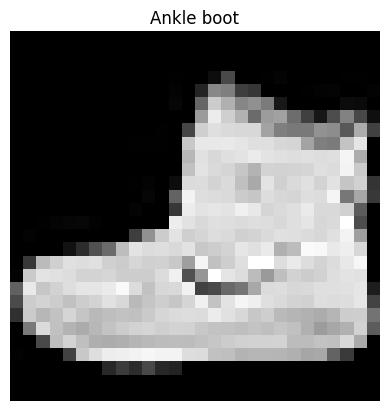

In [9]:
print(f'Image shape: {image.shape}')
plt.imshow(image.squeeze(), cmap='gray')
plt.title(classes_name[label])
plt.axis(False)
plt.show()

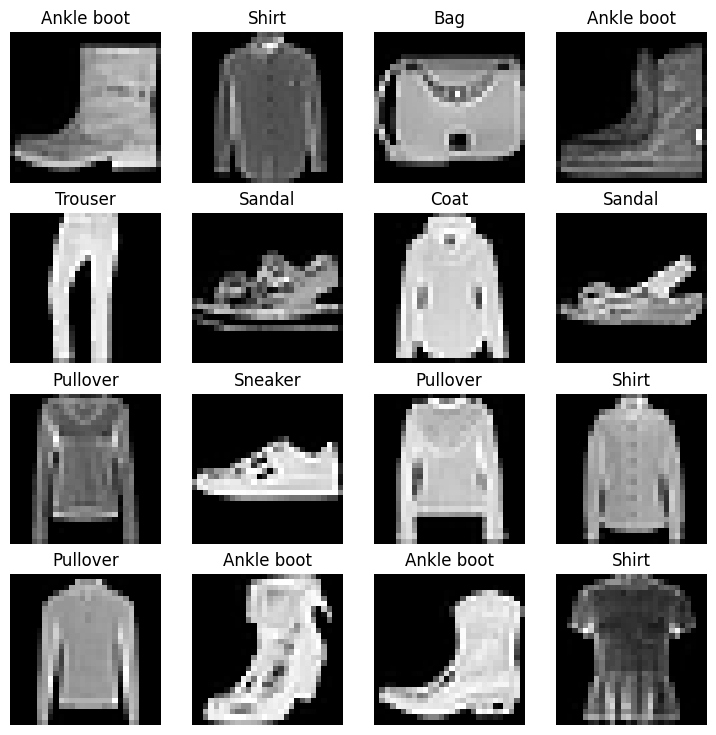

In [10]:
# Plot more images

# set random seed
torch.manual_seed(42)

fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(low=0, high=len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(classes_name[label])
    plt.axis(False)
plt.show()
    

## 2. DataLoader

In [11]:
# Setup the batch size as hyperparameter
BATCH_SIZE = 32

# Turn the dataset into iterable (batch sizes)
train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

# Let's check out what what we've created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f7f51f0eb70>, <torch.utils.data.dataloader.DataLoader object at 0x7f7f5030d8e0>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [12]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

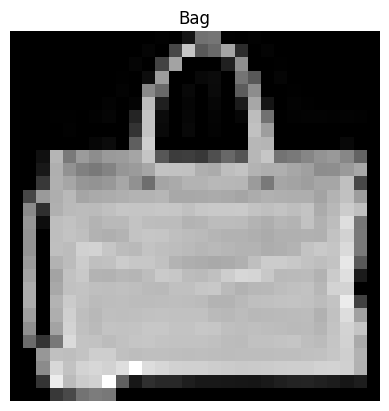

In [13]:
#Show a sample

# torch.manual_seed(42)
rand_idx = torch.randint(low=0, high=len(train_features_batch), size=[1]).item()
img, label = train_features_batch[rand_idx], train_labels_batch[rand_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(classes_name[label])
plt.axis(False)
plt.show()

## 3. Build a Baseline Model: Model_0


In [14]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Cretae some dummy data
x = train_features_batch[0]

output = flatten_model(x)

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [15]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self, 
                 input_shape: int,  
                 output_shape: int, 
                 hidden_units: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)
        

In [16]:
torch.manual_seed(42)


# Setuo the model with input parameters
model_0 = FashionMNISTModelV0(input_shape=28*28,
                              hidden_units=10, 
                              output_shape=len(classes_name)).to('cpu')

model_0


FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [17]:
dummy_x = torch.rand([1, 1, 28, 28])

model_0(dummy_x).shape

torch.Size([1, 10])

In [18]:
# Create Loss function, Optimizer and Evaluation Metrics (accuracy func)
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

from helper_functions import accuracy_fn


### 3.1 Creating a function to time our experiments
Machine learning is very experimental.

Two of the main things you'll often want to track are:

1. Model's performance (loss and accuracy values etc)
2. How fast it runs

In [19]:
from timeit import default_timer as timer

def print_train_time(start_time: float,
                     end_time: float,
                     device: torch.device = None):
    """Print between start and end time"""
    total_time = end_time - start_time
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [20]:
start_time = timer()
print('time checking')
end_time = timer()
print_train_time(start_time=start_time, end_time=end_time, device='cpu')

time checking
Train time on cpu: 0.000 seconds


0.0001441150000118796

## 3.2 Some notes on **Batch** and **batch_sizes**:

### batch_sizes = 32 
- means in a **Fold or Batch** we have **32 data or images**

### Fold or Batch:
- Let, we have total data 60,000 and in each batch we have 32 images **(batch_sizes = 32)**. Now we want to calculate how many **Fold or Batch** by using, $$batch\_number = \frac{total\_samples}{batch\_sizes}$$
- Here we have $$batch\_number = \frac{60000}{32}$$ $$batch\_number = 1875$$

In [21]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and train start time
torch.manual_seed(42)

train_time_start_on_cpu = timer()

# Set the number of Epochs
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through the training batches
    for batch, (X,y) in enumerate(train_dataloader):
        # Train Model
        model_0.train()
        # 1. Forward Pass
        y_pred = model_0(X)

        # 2. Calculate train loss per batch
        loss = loss_fn(y_pred,y)
        train_loss += loss # accumulate train loss

        # 3. Optimize zero grad
        optimizer.zero_grad()

        # 4. loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # print what happening
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.") # total number of sample after N th batch = N * len(X); len(X) defines how much data/img in one batch

    # Divide total train loss by length of train dataloader
    train_loss = train_loss / len(train_dataloader) # find the average trainloss in total 1875 batches


    ### Testing
    test_loss, test_acc = 0, 0

    # model eval mode
    model_0.eval()

    # forward pass with inference_mode
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # Forward Pass
            test_pred = model_0(X_test)

            # Calculate test loss accumatively
            test_loss += loss_fn(test_pred, y_test)

            # Calculate test accuracy
            test_acc += accuracy_fn(y_test, test_pred.argmax(dim=1))

        # Calculate the test loss average per batch
        test_loss = test_loss / len(test_dataloader)

        # Calculate the test acc average per batch
        test_acc /= len(test_dataloader)


    # Print out what's happening
    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

            
            

train_time_end_on_cpu = timer()

total_train_time_model_0 = print_train_time(start_time=train_time_start_on_cpu, 
                                            end_time=train_time_end_on_cpu, 
                                            device=str(next(model_0.parameters()).device))




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5904 | Test loss: 0.5095 | Test acc: 82.0387
Epoch: 1
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4763 | Test loss: 0.4799 | Test acc: 83.1969
Epoch: 2
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4550 | Test loss: 0.4766 | Test acc: 83.4265
Train time on cpu: 29.898 seconds


## 4. Make predictions and get Model 0 results


In [22]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device= None):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """

    test_loss, test_acc = 0, 0
    model.eval()

    with torch.inference_mode():
        for X_test, y_test in tqdm(data_loader):

            X_test, y_test = X_test.to(device), y_test.to(device)
            # Make Prediction (Forward Pass)
            test_pred = model(X_test)

            # Accumulate loss & accuracy values per batch
            test_loss += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(y_test, test_pred.argmax(dim=1))

        # Scale loss and acc to find the average loss/acc per batch
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)

    return {
        "model_name": model.__class__.__name__,
        "model_test_loss": test_loss.item(),
        "model_test_accuracy": test_acc
    }



# Calculate model_0 value with test data
model_0_test_results = eval_model(model=model_0,
                                  data_loader=test_dataloader,
                                  loss_fn=loss_fn, 
                                  accuracy_fn=accuracy_fn,
                                  device='cpu')


model_0_test_results



  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_test_loss': 0.47663894295692444,
 'model_test_accuracy': 83.42651757188499}

#### Device Agnostic Code

In [23]:
!nvidia-smi

Sun Feb  9 13:58:55 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.01             Driver Version: 535.183.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1050 Ti     Off | 00000000:01:00.0  On |                  N/A |
| N/A   42C    P8              N/A / ERR! |     49MiB /  4096MiB |      5%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [24]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## Build a better Model with non-linearity

In [25]:
# Create a Model with non-linear and linear layers

class FashionMNISTMODELV1(nn.Module):
    def __init__(self, 
                 input_shape: int,
                 hidden_units: int, 
                 output_shape: int, 
                 ):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [26]:
# Create an instance of mode_1 send it to device (GPU if it is available)

torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_1 = FashionMNISTMODELV1(input_shape=28*28,
                              hidden_units=10,
                              output_shape=len(classes_name)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

## Setup Loss function, Optimizer & Evaluation Metric (i.e. Accuracy)

In [27]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)


## Functionalizing the training and testing / evaluation loop

Create function for:

* training loop: `train_step()`
* testing loop: `test_step()` 

In [28]:
def train_step(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer, 
               accuracy_fn,
               device: torch.device = device) -> None:
    """Performs a training with model trying to learn on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        optimizer (torch.optim.Optimizer): The optimizer of model 
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        None: This function only prints train loss & accuracy. It does not return anything.
    """

    train_loss, train_acc = 0, 0

    # Train Model
    model.train()
    
    for batch, (X_train,y_train) in enumerate(data_loader):

        # Put data on target device
        X_train, y_train = X_train.to(device), y_train.to(device)

        # 1. Forward Pass
        y_pred = model(X_train)
    
        # 2. Calculate train loss & accuracy per batch
        loss = loss_fn(y_pred,y_train)
        train_loss += loss # accumulate train loss

        train_acc += accuracy_fn(y_true=y_train, y_pred=y_pred.argmax(dim=1))
        
    
        # 3. Optimize zero grad
        optimizer.zero_grad()
    
        # 4. loss backward
        loss.backward()
    
        # 5. Optimizer step
        optimizer.step()
    
    # Divide total train loss by length of train dataloader
    train_loss = train_loss / len(data_loader) # find the average trainloss in whole batch
    train_acc = train_acc / len(data_loader) # find the average train accuracy in whole batch
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")
    


In [29]:
def test_step(model: torch.nn.Module, 
              data_loader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module, 
              accuracy_fn,
              device: torch.device = device) -> None:
    
    """Performs a training with model trying to learn on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        None: This function only prints test loss & accuracy. It does not return anything.
    """

    test_loss, test_acc = 0, 0
    
    # Put the model in eval mode
    model.eval()

    # Turn on inference mode context manager
    with torch.inference_mode():
        for X_test, y_test in data_loader:
            
            # Send the data to the target device
            X_test, y_test = X_test.to(device), y_test.to(device)

            # 1. Forward pass (outputs raw logits)
            test_pred = model(X_test)

            # 2. Calculuate the loss/acc
            test_loss += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(y_true=y_test,
                              y_pred=test_pred.argmax(dim=1)) # go from logits -> prediction labels 

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

    

In [30]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# measure time
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(model=model_1, 
               data_loader=train_dataloader, 
               loss_fn=loss_fn, 
               optimizer=optimizer, 
               accuracy_fn=accuracy_fn, 
               device=device)
    test_step(model=model_1, 
              data_loader=test_dataloader, 
              loss_fn=loss_fn, 
              accuracy_fn=accuracy_fn, 
              device=device)


train_time_end_on_gpu = timer()

total_train_time_model_1 = print_train_time(start_time=train_time_start_on_gpu, 
                                            end_time=train_time_end_on_gpu, 
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199 | Train acc: 61.34%
Test loss: 0.95636 | Test acc: 65.00%

Epoch: 1
---------
Train loss: 0.78101 | Train acc: 71.93%
Test loss: 0.72227 | Test acc: 73.91%

Epoch: 2
---------
Train loss: 0.67027 | Train acc: 75.94%
Test loss: 0.68500 | Test acc: 75.02%

Train time on cuda: 32.882 seconds


In [31]:
# Get model_1 results
model_1_test_results = eval_model(model=model_1, 
                                  data_loader=test_dataloader, 
                                  loss_fn=loss_fn, 
                                  accuracy_fn=accuracy_fn, 
                                  device=device)
model_1_test_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTMODELV1',
 'model_test_loss': 0.6850008964538574,
 'model_test_accuracy': 75.01996805111821}

In [32]:
model_0_test_results

{'model_name': 'FashionMNISTModelV0',
 'model_test_loss': 0.47663894295692444,
 'model_test_accuracy': 83.42651757188499}

## Model 2: Build a Convolutional Neural Network **CNN**

CNN's are also known ConvNets.

CNN's are known for their capabilities to find patterns in visual data.

To find out what's happening inside a CNN, see this website: **https://poloclub.github.io/cnn-explainer/**

In [33]:
# Create a CNN

class FashionMNISTModelV2(nn.Module):
    """
    Model architecture that replicates the TinyVGG
    model from CNN explainer website.
    """
    def __init__(self, 
                 input_shape: int, 
                 hidden_shape: int, 
                 output_shape: int):
        super().__init__()

        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_shape, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_shape, out_channels=hidden_shape, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_shape, out_channels=hidden_shape, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_shape, out_channels=hidden_shape, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_shape*7*7, out_features=output_shape)
        )


    def forward(self, x):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

        
        
        

In [34]:
torch.manual_seed(42)

model_2 = FashionMNISTModelV2(input_shape=1, 
                              hidden_shape=10, 
                              output_shape=len(classes_name)).to(device)


### Setup loss function, optimizer and accuracy



In [35]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

from helper_functions import accuracy_fn

### Train 

In [36]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
train_start_time_model_2 = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(model=model_2, 
               data_loader=train_dataloader, 
               loss_fn=loss_fn, 
               optimizer=optimizer, 
               accuracy_fn=accuracy_fn, 
               device=device)
    test_step(model=model_2, 
              data_loader=test_dataloader, 
              loss_fn=loss_fn, 
              accuracy_fn=accuracy_fn, 
              device=device)
    

train_end_time_model_2 = timer()

total_train_time_model_2 = print_train_time(start_time=train_start_time_model_2, 
                                            end_time=train_end_time_model_2, 
                                            device=device)



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.59498 | Train acc: 78.36%
Test loss: 0.39639 | Test acc: 85.92%

Epoch: 1
---------
Train loss: 0.35978 | Train acc: 87.05%
Test loss: 0.35013 | Test acc: 87.10%

Epoch: 2
---------
Train loss: 0.31891 | Train acc: 88.50%
Test loss: 0.31732 | Test acc: 88.86%

Train time on cuda: 38.725 seconds


In [37]:
# Get the model 2 result
model_2_test_results = eval_model(model=model_2, 
                                  data_loader=test_dataloader, 
                                  loss_fn=loss_fn, 
                                  accuracy_fn=accuracy_fn, 
                                  device=device)





model_2_test_results



  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_test_loss': 0.31731659173965454,
 'model_test_accuracy': 88.85782747603834}

In [38]:
# Compare the models results
import pandas as pd

compare_df = pd.DataFrame([model_0_test_results,
                           model_1_test_results,
                           model_2_test_results])
# Add traing time in df
compare_df['training_time'] = [total_train_time_model_0,
                               total_train_time_model_1, 
                               total_train_time_model_2]

compare_df

,model_name,model_test_loss,model_test_accuracy,training_time
0,FashionMNISTModelV0,0.476639,83.426518,29.897844
1,FashionMNISTMODELV1,0.685001,75.019968,32.882259
2,FashionMNISTModelV2,0.317317,88.857827,38.725326


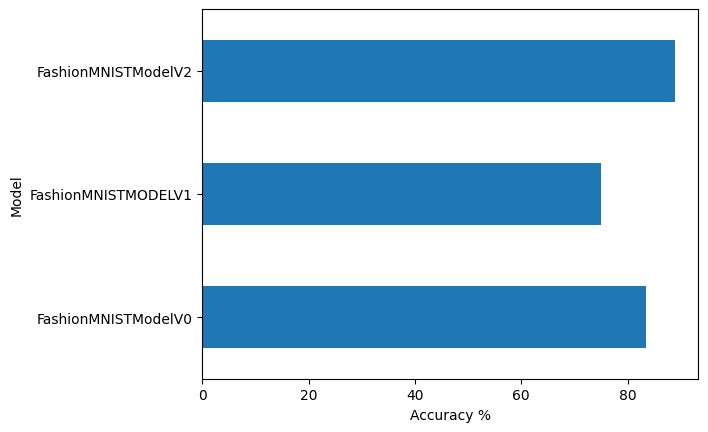

In [39]:
# visualize
compare_df.set_index('model_name')['model_test_accuracy'].plot(kind="barh")
plt.xlabel("Accuracy %")
plt.ylabel('Model')
plt.show()

## Make and evaluate random predictions with best model

In [40]:
def make_predictions(model:torch.nn.Module,
                    data: list, device: torch.device = device) -> torch.Tensor:

    """Make Predictions on Random Data

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data.
        data (list): The list of data.\
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        Tensor: It returns the prediction probabilities tensor
    """
    
    pred_probs = []
    model.to(device)
    model.eval()

    with torch.inference_mode():
        for sample in data:
            # print(sample.shape)
            # Prepare the sample (add a batch and pass to the target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)
            
            # Forward pass (model outputs -> raw logits)
            pred_logit = model(sample)
            # print(f"Pred_logit shape: {pred_logit.shape}")
            
            # Get prediction probability (raw logit -> probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            # print(f"Pred_prob shape: {pred_prob.shape}")

            # Get pred_prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs turn into tensor
    return torch.stack(pred_probs)



In [41]:
import random

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first sample
test_samples[0].shape

torch.Size([1, 28, 28])

In [42]:
# Make Predictions
pred_probs = make_predictions(model=model_2, data=test_samples, device=device)

pred_probs[:2]

tensor([[2.4737e-04, 5.5391e-06, 7.9121e-03, 3.8148e-06, 8.6605e-01, 1.9361e-07,
         1.2567e-01, 2.5313e-06, 9.8789e-05, 4.7599e-06],
        [8.4242e-08, 1.4070e-08, 3.2654e-08, 4.9459e-07, 6.7401e-07, 4.6980e-05,
         1.6889e-07, 5.6564e-05, 2.6080e-05, 9.9987e-01]])

In [43]:
# Convert probabilities to labels
pred_labels = pred_probs.argmax(dim=1)
pred_labels

tensor([4, 9, 4, 7, 7, 8, 5, 4, 5])

In [44]:
test_labels


[4, 9, 2, 7, 7, 8, 5, 4, 5]

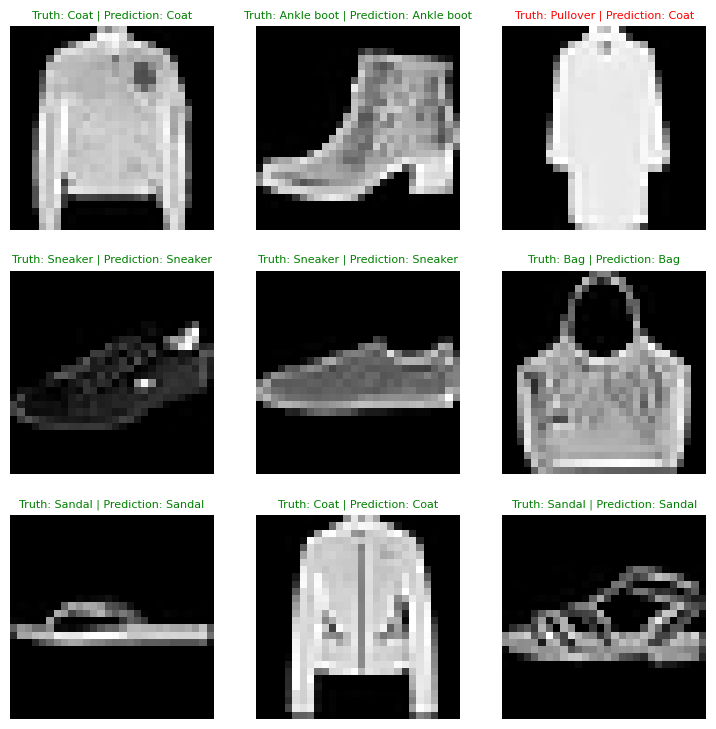

In [45]:
plt.figure(figsize=(9,9))
nrows=3
ncols=3

for i, sample in enumerate(test_samples):
    # create subplot
    plt.subplot(nrows, ncols, i+1)

    # plot the samle
    plt.imshow(sample.squeeze(), cmap='gray')

    # find the prediction label
    pred_label = classes_name[pred_labels[i]]

    # truth label
    truth_label = classes_name[test_labels[i]]

    # title text
    title_text = f'Truth: {truth_label} | Prediction: {pred_label}'

    if pred_label == truth_label:
        plt.title(title_text, c='g', fontsize=8)
    else:
        plt.title(title_text, c='r', fontsize=8)

    plt.axis(False)        
    






## Making Confusion Matrix for futher prediction evaluation

In [46]:
from tqdm.auto import tqdm


# 1. Make prediction with trained model
y_preds = []

model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making Predictions...."):
        # send the data and target to the target device
        X,y = X.to(device), y.to(device)

        # make foward pass
        y_logit = model_2(X)

        # print(y_logit.shape)
        # print(torch.softmax(y_logit, dim=1).argmax(dim=1).shape)
    
        # turn predictions from logits -> probabilities -> label
        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # here in both case i want to calculate row wise. not column wise because column wise will be the probabilities along the batches not the labels 

        # put predictions on CPU
        y_preds.append(y_pred.cpu())
    # now Concatenate all the preds (all batches)
    y_preds_tensor = torch.cat(y_preds)
    # print(y_preds_tensor.shape)
    

Making Predictions....:   0%|          | 0/313 [00:00<?, ?it/s]

In [47]:
!pip install -qq mlxtend

In [57]:
from mlxtend.plotting import plot_confusion_matrix
from torchmetrics import ConfusionMatrix

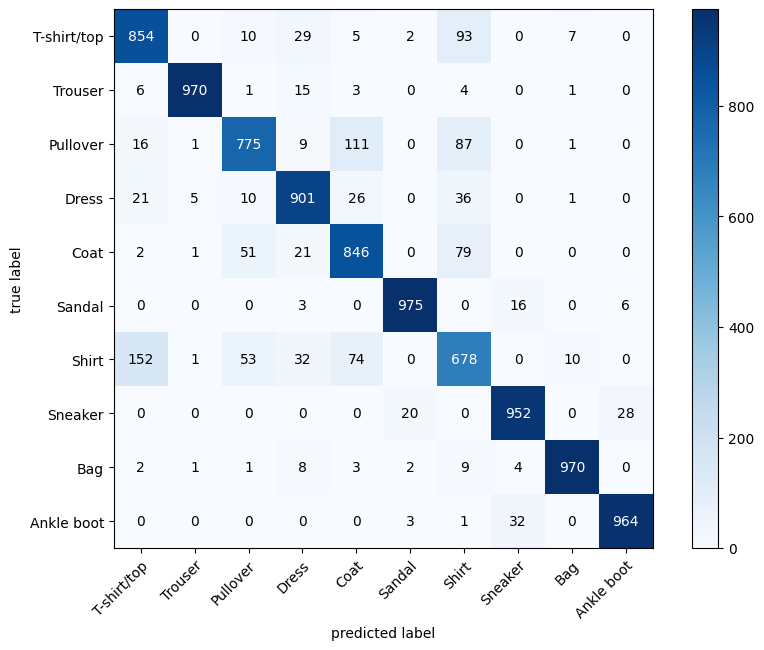

In [60]:
# 2. Create the confusion matrix
confmat = ConfusionMatrix(task='multiclass', num_classes=len(classes_name))
confmat_tensor = confmat(preds=y_preds_tensor, 
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(), colorbar=True, class_names=classes_name, figsize=(10,7))

In [63]:
from pathlib import Path

# Create model path if it is not alread exist
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create Model Save Path
MODEL_NAME = "03_pytorch.computer_vision_fashion_mnist_Tiny_vgg.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME


# Save the model
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)


Saving model to: models/03_pytorch.computer_vision_fashion_mnist_Tiny_vgg.pth


In [64]:
# Load the model
# first create the model instance
loaded_model_2 = FashionMNISTModelV2(input_shape=1, hidden_shape=10, output_shape=10)

# Load the model state dict
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to GPU
loaded_model_2 = loaded_model_2.to(device)

/tmp/ipykernel_5512/1588420321.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


In [65]:
# Evaluate the loaded model

torch.manual_seed(42)
torch.cuda.manual_seed(42)

loaded_model_2_results = eval_model(model=loaded_model_2, 
                                    data_loader=test_dataloader, 
                                    loss_fn=loss_fn, 
                                    accuracy_fn=accuracy_fn, 
                                    device=device)
loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_test_loss': 0.31731659173965454,
 'model_test_accuracy': 88.85782747603834}

In [67]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_2_test_results['model_test_loss']),
              torch.tensor(loaded_model_2_results['model_test_loss']),atol=1e-08)

tensor(True)